# Descripción del proyecto

## Inicialización 

En la primera parte de este trabajo se llevarán a cabo los siguientes procesos:
1. Cargar las librerías necesarias para el análisis.
2. Importar el conjunto de datos.
3. Revisar los datos para proceder a su limpieza y enriquecimiento, en caso de ser necesario.


In [22]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans 

In [2]:
gym = pd.read_csv("gym_churn_us.csv")

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.columns = gym.columns.str.lower()

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
#Comparar datos de personas de personas con y sin suscripción activa

gym_comparison = gym.groupby('churn').mean()

gym_comparison

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
#Extraer lista con nombres de columnas 
variables = gym.columns
variables

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

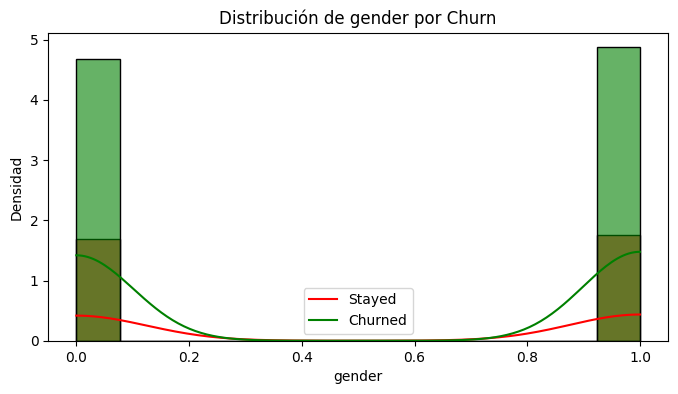

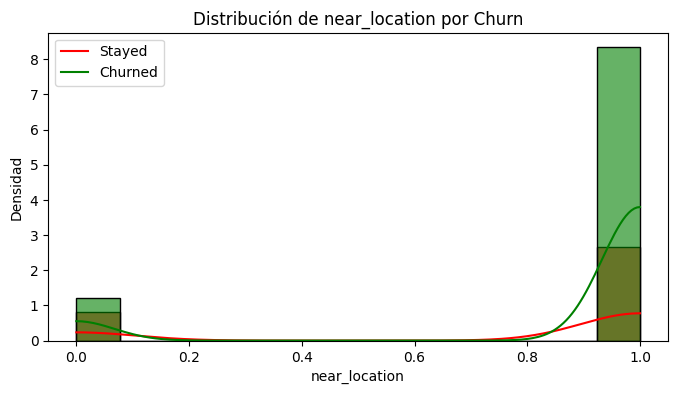

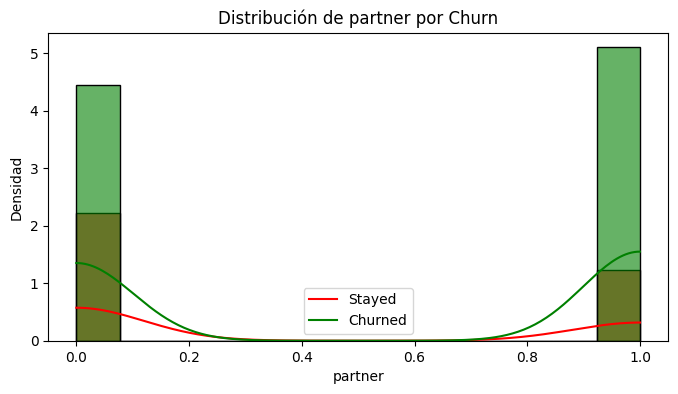

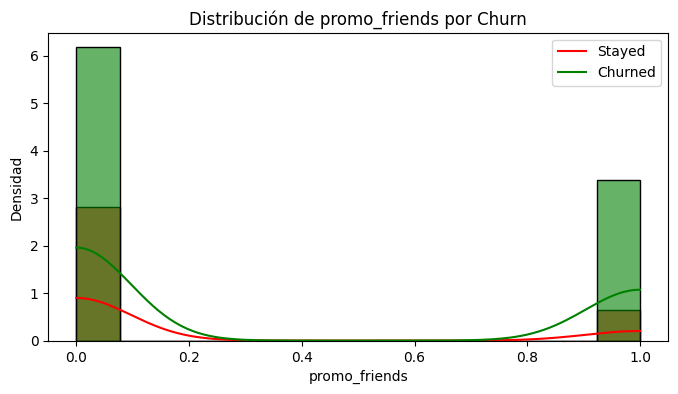

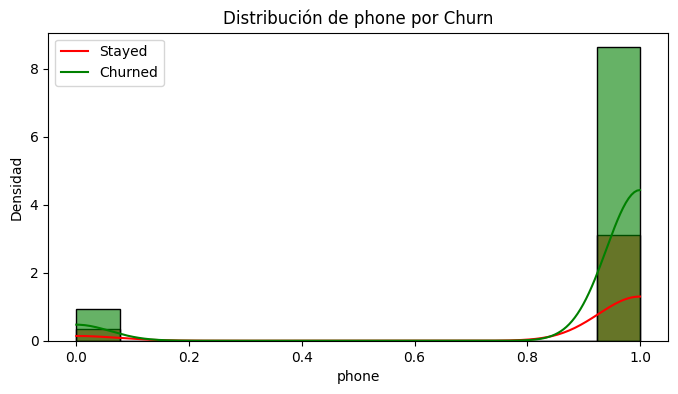

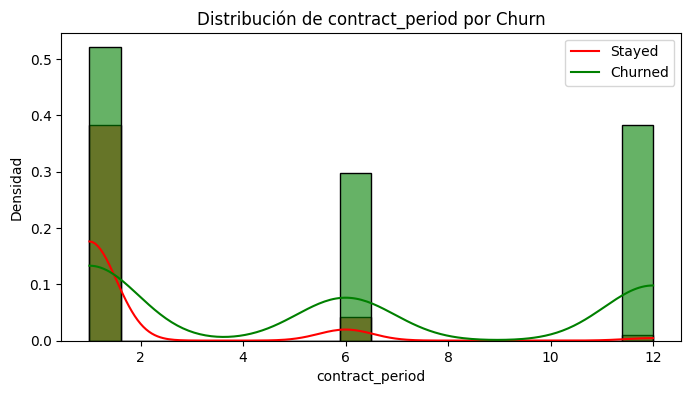

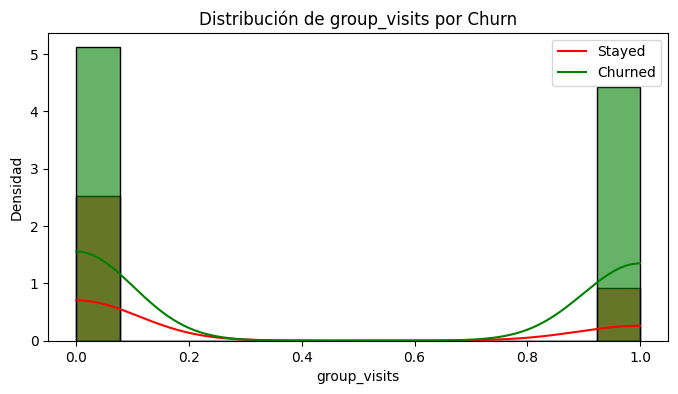

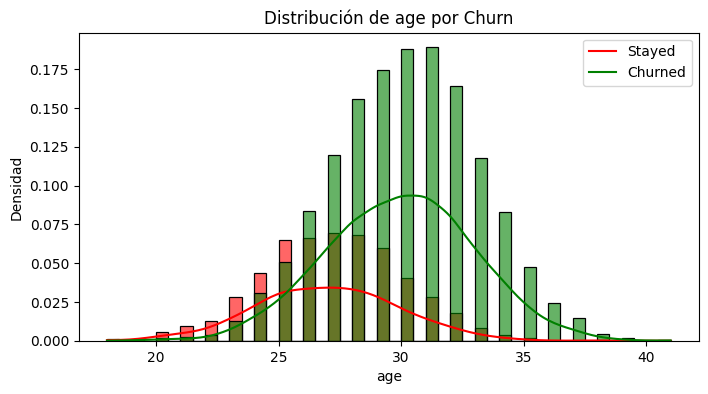

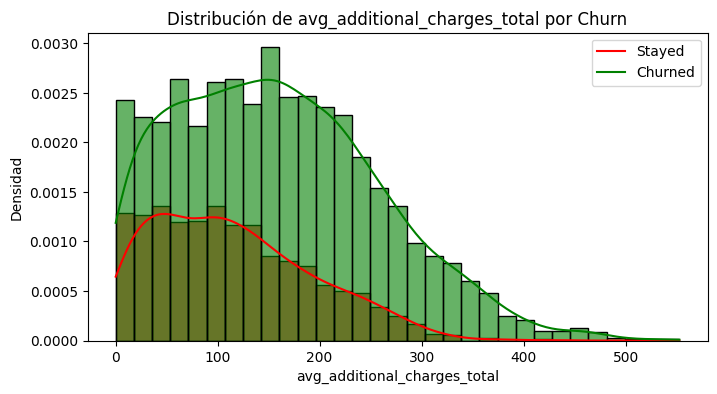

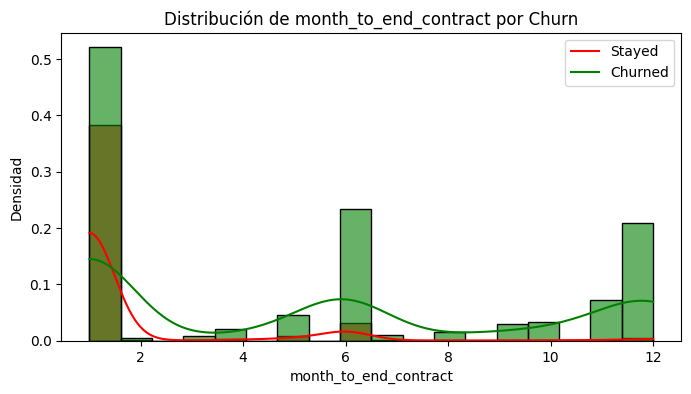

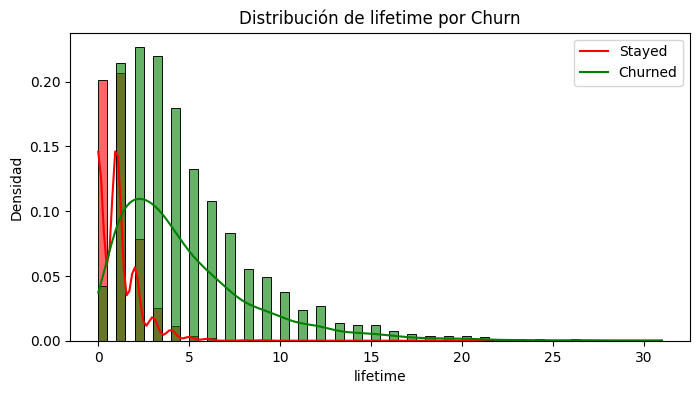

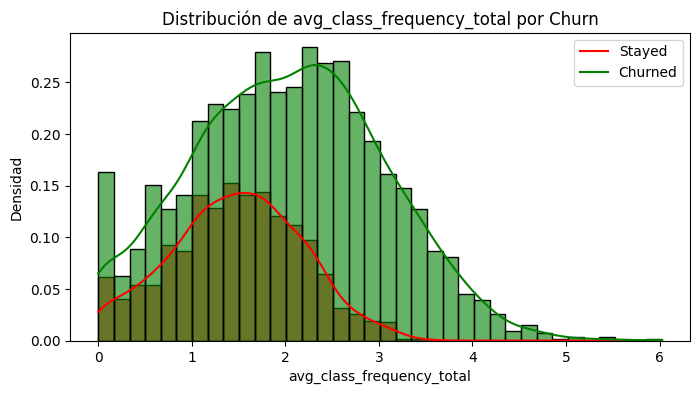

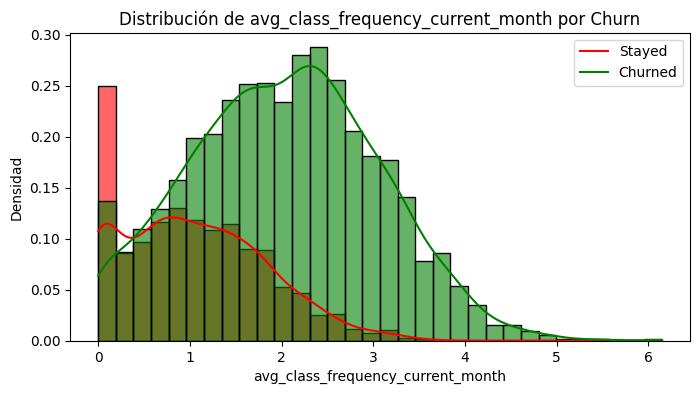

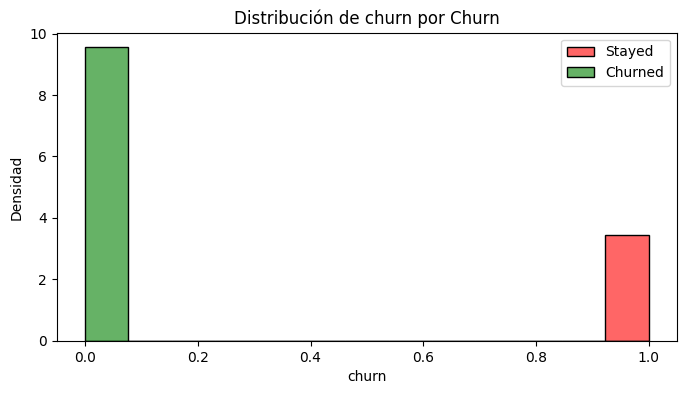

In [11]:
#Visualizar distribución de datos por 

for variable in variables: 
    plt.figure(figsize=(8, 4))
    
    # Histograma con densidad para cada grupo
    sns.histplot(data=gym, x=variable, hue='churn', kde=True, 
                 stat="density", alpha=0.6, palette={0: "green", 1: "red"})
    
    # Configurar el gráfico
    plt.title(f"Distribución de {variable} por Churn")
    plt.xlabel(variable)
    plt.ylabel("Densidad")
    plt.legend(labels=["Stayed", "Churned"])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

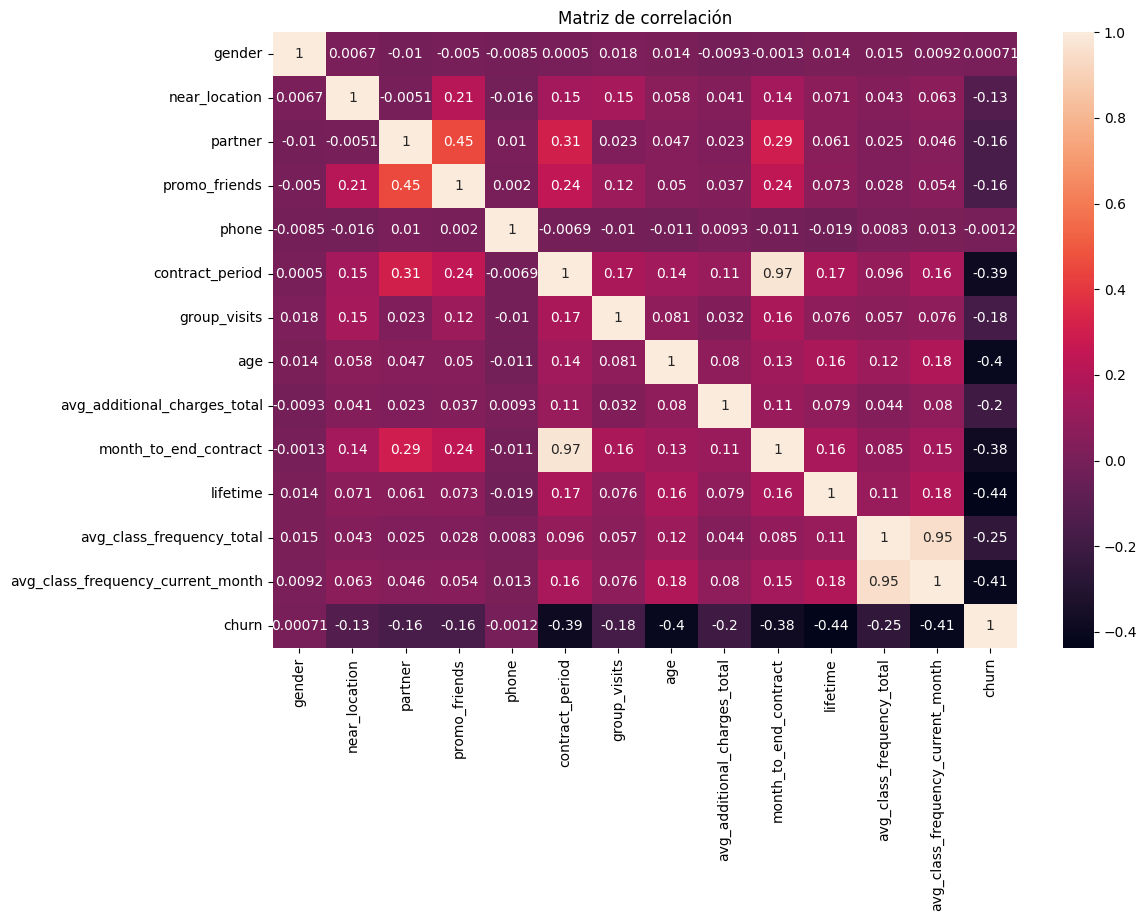

In [ ]:
#Crear mapa de calor para matriz de correlación 

plt.figure(figsize=(12, 8))
sns.heatmap(gym.corr(), annot=True)

plt.title('Matriz de correlación')

plt.show()

## Crear modelo para predicción de cancelación membresía 

In [33]:
#Extraer valores y variable
valores = gym.drop(columns='churn', axis=1)
variable = gym['churn']

In [34]:
#Generar datos para entrenamiento y validación
valores_entrenamiento, valores_validacion, variable_entrenamiento, variable_validacion = train_test_split(valores, variable, test_size=0.2, random_state=7)

In [35]:
#Guardar modelo de Regresión Lineal 
modelo_rl = LogisticRegression()

In [36]:
#Entrenar modelo 
modelo_rl.fit(valores_entrenamiento, variable_entrenamiento)

c:\Users\Lenovo\Desktop\TripleTen\Ambientes_virtuales_Proyectos\venv_13\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
#Generar predicciones
prediccion_prob = modelo_rl.predict_proba(valores_validacion)
prediccion = modelo_rl.predict(valores_validacion)

In [39]:
#Calcular métricas de evaluación

rl_accuracy = accuracy_score(variable_validacion, prediccion)
rl_precision = precision_score(variable_validacion, prediccion)
rl_recall = recall_score(variable_validacion, prediccion)

print('La exactitud del modelo logístico es: {:.2f}'.format(rl_accuracy))
print('La precisión del modelo logístico es: {:.2f}'.format(rl_precision))
print('La recuperación del modelo logístico es: {:.2f}'.format(rl_recall))

La exactitud del modelo logístico es: 0.91
La precisión del modelo logístico es: 0.87
La recuperación del modelo logístico es: 0.78
